# XRD Data Visualization

This notebook automatically plots all XYE files found in the current directory.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import glob
import os

# Set up plotting style
plt.style.use('default')
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12

def load_xye_file(filename):
    """Load XYE file and return 2theta, intensity, error arrays."""
    data = np.loadtxt(filename, comments='#')
    two_theta = data[:, 0]
    intensity = data[:, 1]
    error = data[:, 2]
    return two_theta, intensity, error

def plot_xrd_pattern(filename):
    """Plot XRD pattern from XYE file."""
    try:
        two_theta, intensity, error = load_xye_file(filename)
        
        # Create the plot
        fig, ax = plt.subplots(figsize=(12, 6))
        
        # Plot the data
        ax.plot(two_theta, intensity, 'b-', linewidth=1, label='Intensity')
        
        # Fill under the curve for better visualization
        ax.fill_between(two_theta, 0, intensity, alpha=0.3, color='blue')
        
        # Formatting
        ax.set_xlabel('2θ (degrees)', fontsize=14)
        ax.set_ylabel('Intensity (counts)', fontsize=14)
        ax.set_title(f'XRD Pattern: {os.path.basename(filename)}', fontsize=16, fontweight='bold')
        ax.grid(True, alpha=0.3)
        ax.set_xlim(two_theta.min(), two_theta.max())
        ax.set_ylim(0, intensity.max() * 1.05)
        
        # Add statistics text box
        stats_text = f'Points: {len(two_theta)}\n'
        stats_text += f'2θ range: {two_theta.min():.2f}° - {two_theta.max():.2f}°\n'
        stats_text += f'Max intensity: {intensity.max():.0f} counts'
        
        ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, 
                verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))
        
        plt.tight_layout()
        plt.show()
        
        return True
        
    except Exception as e:
        print(f"Error plotting {filename}: {e}")
        return False

# Find all XYE files in current directory
xye_files = glob.glob('*.xye')
xye_files.sort()

print(f"Found {len(xye_files)} XYE files:")
for file in xye_files:
    print(f"  - {file}")

Found 5 XYE files:
  - GTT-01-02_Mn2ZnN2.xye
  - MoO3.xye
  - PKT-3-65-2_Pellet.xye
  - TT-01-02 LiMoO2.xye
  - TT-01-03_Mn0.5Zn1.5N2.xye


## Individual XRD Patterns

Each XYE file is plotted below in its own cell:

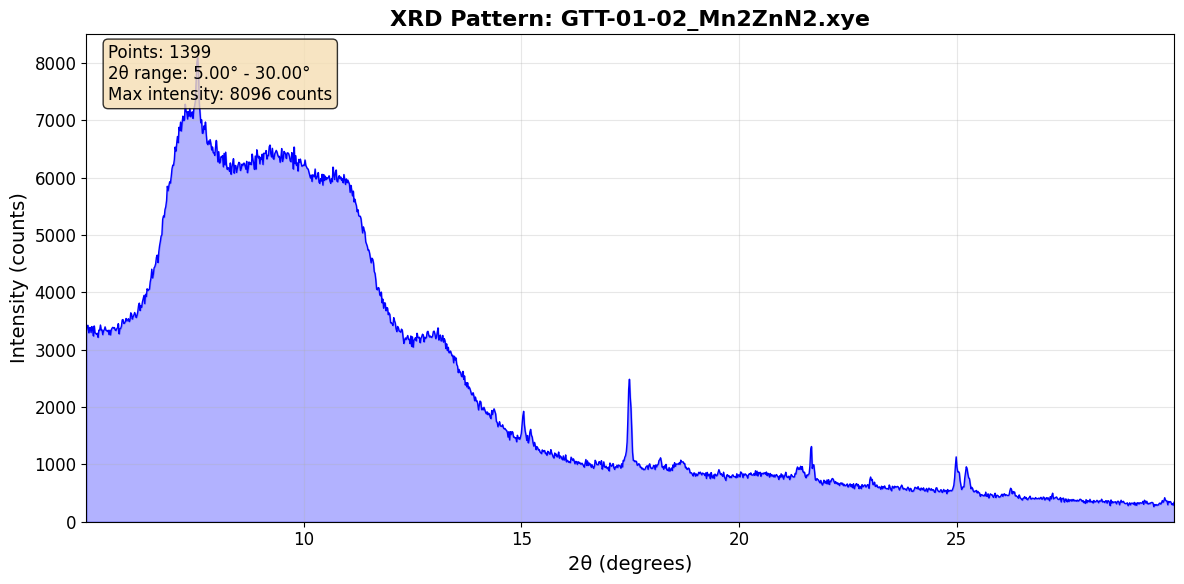

In [2]:
# GTT-01-02_Mn2ZnN2.xye
if 'GTT-01-02_Mn2ZnN2.xye' in xye_files:
    plot_xrd_pattern('GTT-01-02_Mn2ZnN2.xye')
else:
    print("GTT-01-02_Mn2ZnN2.xye not found")

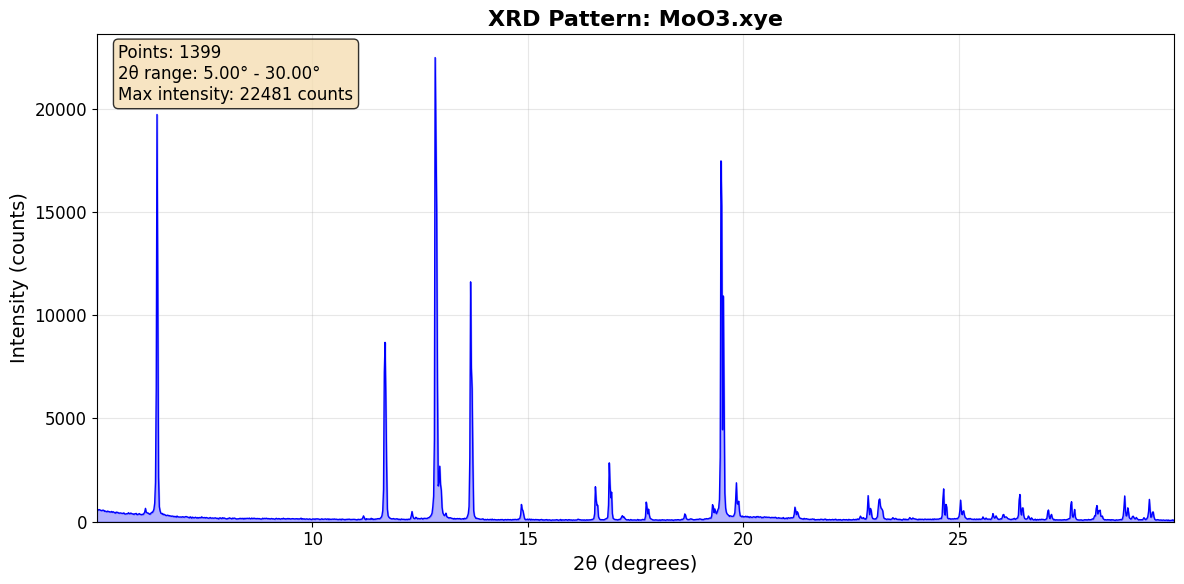

In [3]:
# MoO3.xye
if 'MoO3.xye' in xye_files:
    plot_xrd_pattern('MoO3.xye')
else:
    print("MoO3.xye not found")

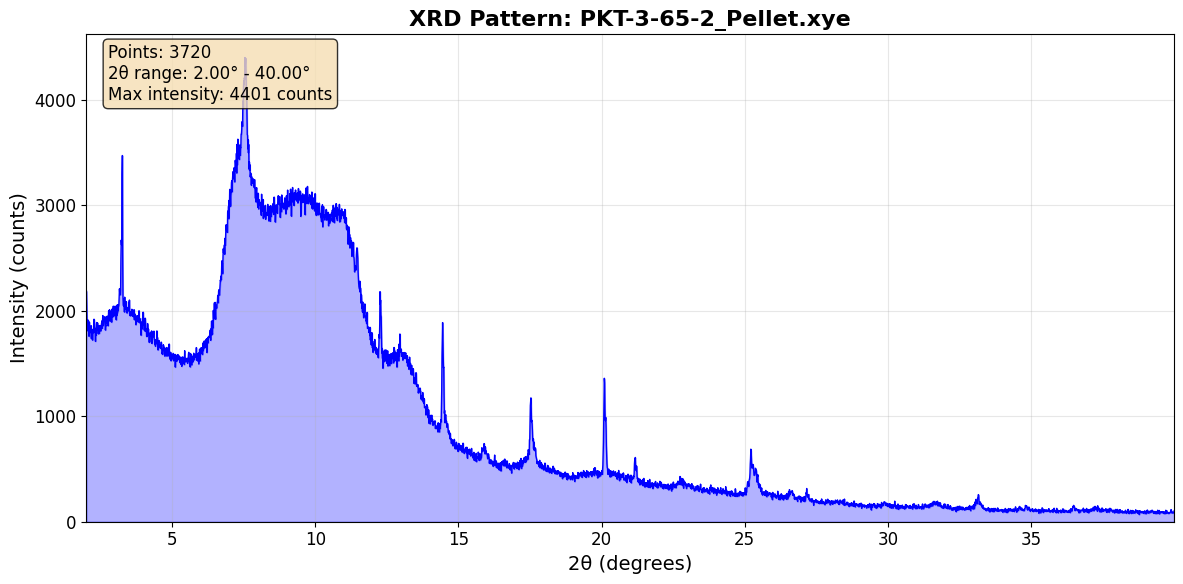

In [4]:
# PKT-3-65-2_Pellet.xye
if 'PKT-3-65-2_Pellet.xye' in xye_files:
    plot_xrd_pattern('PKT-3-65-2_Pellet.xye')
else:
    print("PKT-3-65-2_Pellet.xye not found")

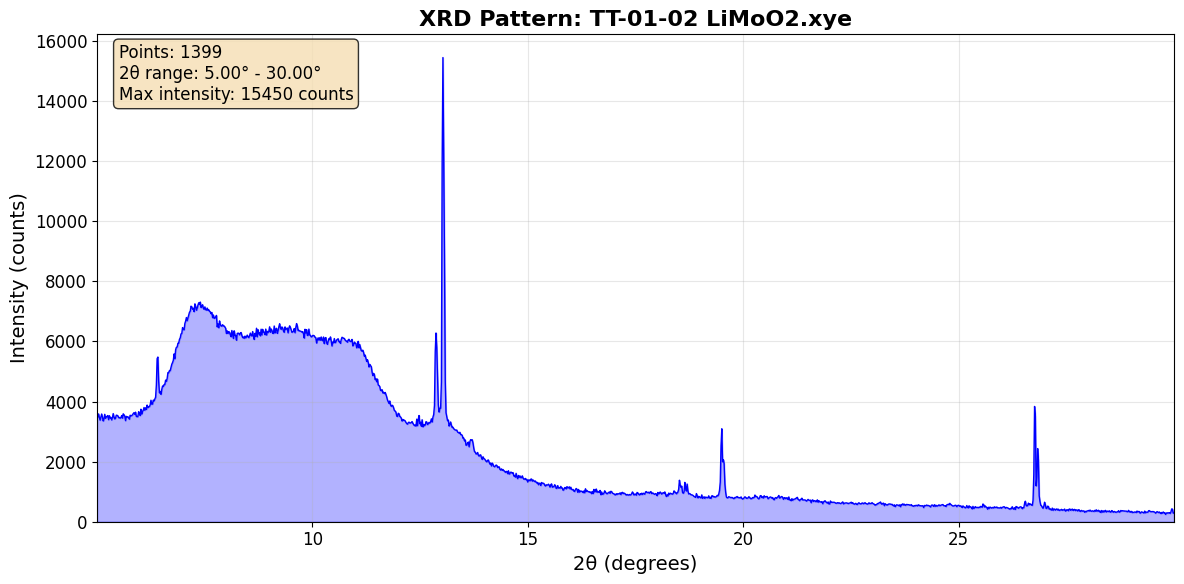

In [5]:
# TT-01-02 LiMoO2.xye
if 'TT-01-02 LiMoO2.xye' in xye_files:
    plot_xrd_pattern('TT-01-02 LiMoO2.xye')
else:
    print("TT-01-02 LiMoO2.xye not found")

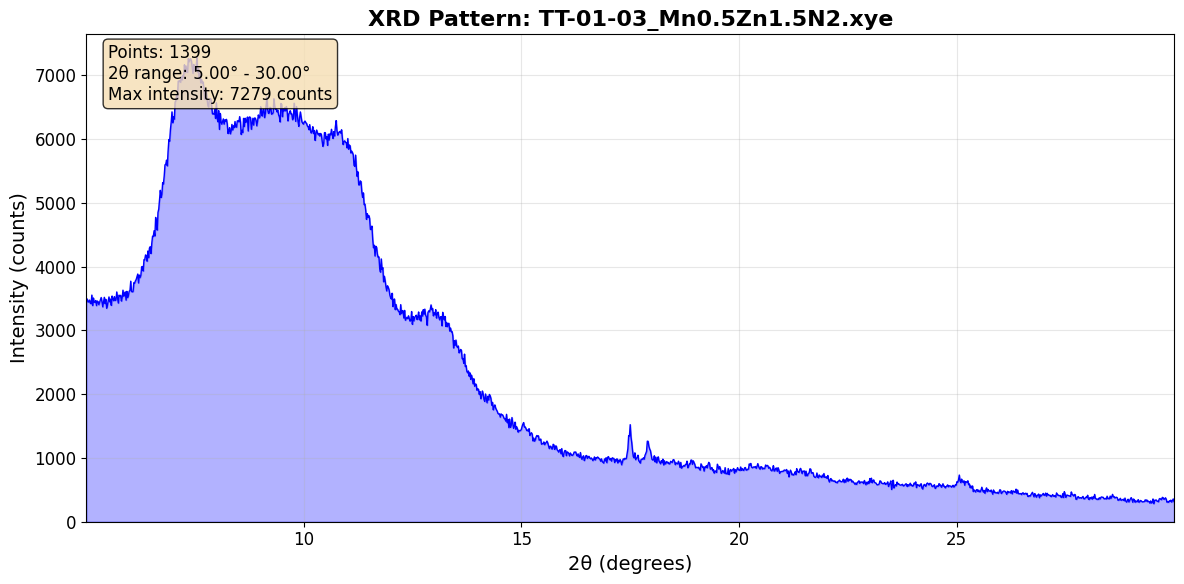

In [6]:
# TT-01-03_Mn0.5Zn1.5N2.xye
if 'TT-01-03_Mn0.5Zn1.5N2.xye' in xye_files:
    plot_xrd_pattern('TT-01-03_Mn0.5Zn1.5N2.xye')
else:
    print("TT-01-03_Mn0.5Zn1.5N2.xye not found")

## Comparison Plot (All Patterns)

Compare all XRD patterns on the same plot:

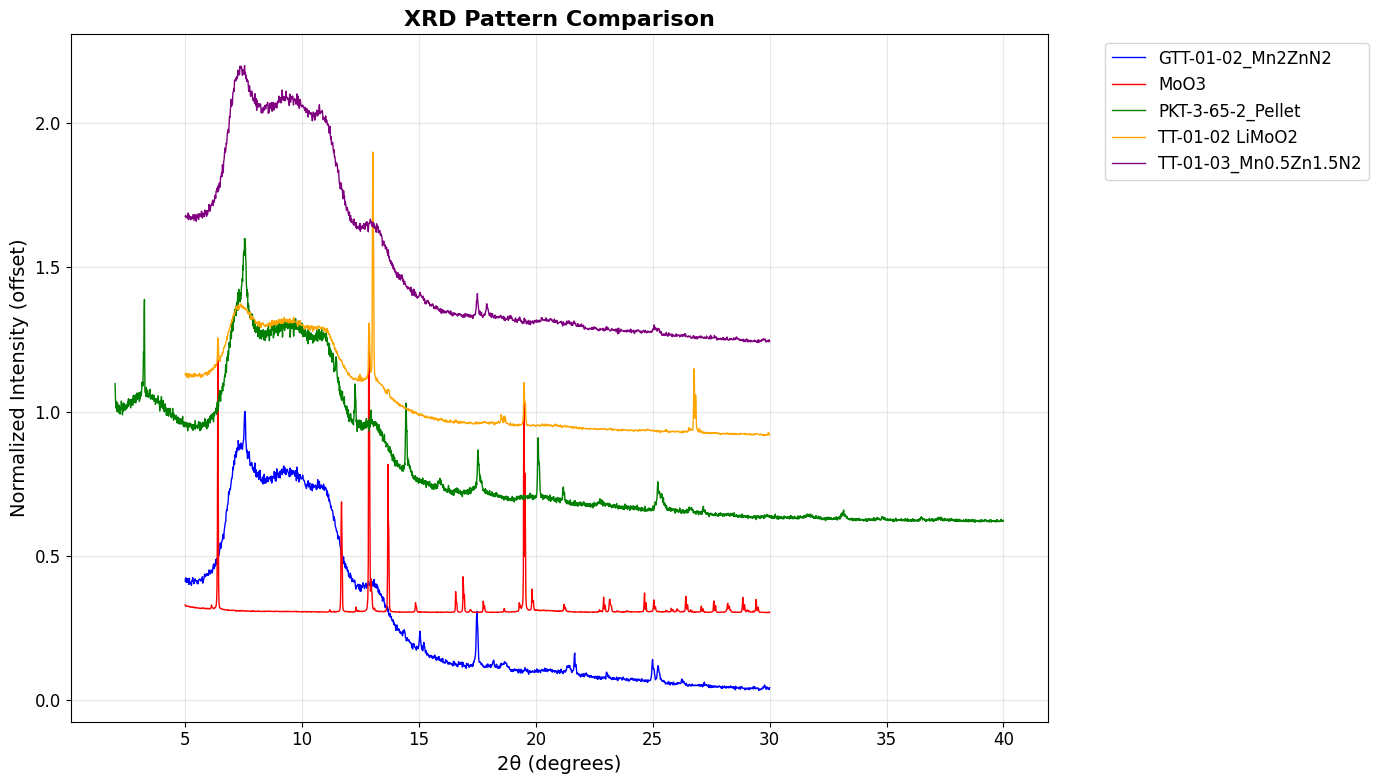

In [7]:
# Plot all patterns together for comparison
if xye_files:
    fig, ax = plt.subplots(figsize=(14, 8))
    
    colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray']
    
    for i, filename in enumerate(xye_files):
        try:
            two_theta, intensity, error = load_xye_file(filename)
            
            # Normalize intensity for comparison (optional)
            intensity_norm = intensity / intensity.max()
            
            # Offset each pattern vertically for clarity
            offset = i * 0.3
            
            color = colors[i % len(colors)]
            label = os.path.splitext(filename)[0]  # Remove .xye extension
            
            ax.plot(two_theta, intensity_norm + offset, color=color, linewidth=1, label=label)
            
        except Exception as e:
            print(f"Error loading {filename}: {e}")
    
    ax.set_xlabel('2θ (degrees)', fontsize=14)
    ax.set_ylabel('Normalized Intensity (offset)', fontsize=14)
    ax.set_title('XRD Pattern Comparison', fontsize=16, fontweight='bold')
    ax.grid(True, alpha=0.3)
    ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    plt.tight_layout()
    plt.show()
else:
    print("No XYE files found for comparison plot")

## Data Summary

Summary statistics for all XRD patterns:

In [8]:
# Create summary table
import pandas as pd

if xye_files:
    summary_data = []
    
    for filename in xye_files:
        try:
            two_theta, intensity, error = load_xye_file(filename)
            
            summary_data.append({
                'Sample': os.path.splitext(filename)[0],
                'Data Points': len(two_theta),
                '2θ Min (°)': f"{two_theta.min():.2f}",
                '2θ Max (°)': f"{two_theta.max():.2f}",
                'Max Intensity': f"{intensity.max():.0f}",
                'Mean Intensity': f"{intensity.mean():.0f}",
                'Std Intensity': f"{intensity.std():.0f}"
            })
            
        except Exception as e:
            print(f"Error processing {filename}: {e}")
    
    if summary_data:
        df = pd.DataFrame(summary_data)
        print("XRD Data Summary:")
        print("=" * 80)
        print(df.to_string(index=False))
else:
    print("No XYE files found for summary")

XRD Data Summary:
               Sample  Data Points 2θ Min (°) 2θ Max (°) Max Intensity Mean Intensity Std Intensity
    GTT-01-02_Mn2ZnN2         1399       5.00      30.00          8096           2264          2202
                 MoO3         1399       5.00      30.00         22481            371          1417
    PKT-3-65-2_Pellet         3720       2.00      40.00          4401            915          1004
      TT-01-02 LiMoO2         1399       5.00      30.00         15450           2312          2293
TT-01-03_Mn0.5Zn1.5N2         1399       5.00      30.00          7279           2269          2215
